***Here we installed the necessary libraries and read our data.***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from tabulate import tabulate
# .txt dosyasını okuma
file_path = '/content/outputacm.txt'
df = pd.read_csv(file_path, delimiter='\t', header=None)  # 'delimiter' ve 'header' ayarları veri yapınıza göre değişebilir.


In [ ]:
print(df)

                                                         0
0                                                   629814
1        #*Automated Deduction in Geometry: 5th Interna...
2                                #@Hoon Hong,Dongming Wang
3                                                   #t2006
4                                                       #c
...                                                    ...
4062897  #@Maryam Shokri,Hamid R. Tizhoosh,Mohamed S. K...
4062898                                             #t2009
4062899                           #cApplied Soft Computing
4062900                                       #index629813
4062901  #!In this paper we address the problem of esti...

[4062902 rows x 1 columns]


**We have seen the necessary information of our data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062902 entries, 0 to 4062901
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
dtypes: object(1)
memory usage: 31.0+ MB


In [ ]:
df.describe()

,0
count,4062902
unique,2167962
top,#c
freq,98594


**We looked at how many lines were duplicated.**

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4062897,False
4062898,True
4062899,True
4062900,False


In [ ]:

duplicated_counts = df.duplicated().value_counts()


print(duplicated_counts)


False    2167962
True     1894940
Name: count, dtype: int64


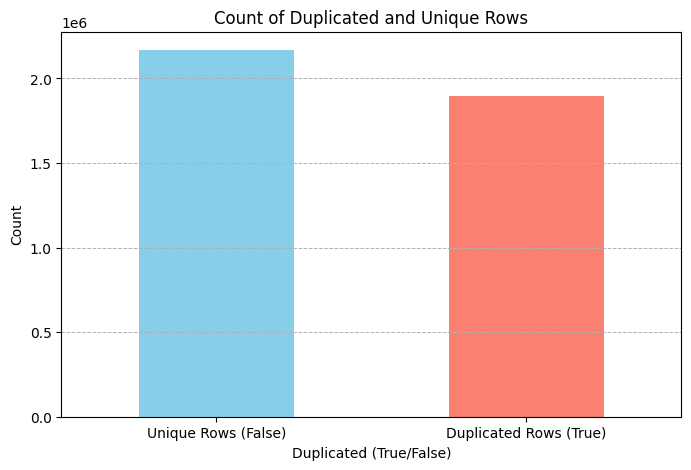

In [ ]:

plt.figure(figsize=(8, 5))
duplicated_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Duplicated and Unique Rows')
plt.xlabel('Duplicated (True/False)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Unique Rows (False)', 'Duplicated Rows (True)'], rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

**We looked at the first 5000 lines of output and examined which information was in which lines in the data.**

In [ ]:
'''with open('outputacm.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        print(line.strip())'''



"with open('outputacm.txt', 'r') as file:\n    lines = file.readlines()\n    for line in lines:\n        print(line.strip())"

**We made sure that the data we had was more clear and organized by giving the necessary titles in a table.**

In [ ]:
import pandas as pd

file_path = "/content/outputacm.txt"

# Initialize lists to store parsed data
data = []
current_record = {
    "index": None,
    "year": None,
    "authors": None,
    "title": None,
    "abstract": None,
    "venue": None,
}

# Read the file line by line
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()
        if line.startswith("#index"):
            # Save the current record if it's complete
            if current_record["index"] is not None:
                data.append(current_record)
            # Start a new record
            current_record = {
                "index": line[6:].strip(),
                "year": None,
                "authors": None,
                "title": None,
                "abstract": None,
                "venue": None,
            }
        elif line.startswith("#*"):
            current_record["title"] = line[2:].strip()
        elif line.startswith("#@"):
            current_record["authors"] = line[2:].strip()
        elif line.startswith("#t"):
            current_record["year"] = line[2:].strip()
        elif line.startswith("#c"):
            current_record["publication venue"] = line[2:].strip()
        elif line.startswith("#!"):
            current_record["abstract"] = line[2:].strip()

    # Add the last record if not already added
    if current_record["index"] is not None:
        data.append(current_record)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Clean up: Convert numeric columns
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["index"] = pd.to_numeric(df["index"], errors="coerce")

# Display the cleaned DataFrame
from IPython.display import display
display(df)


,index,year,authors,title,abstract,venue,publication venue
0,0,2003.0,Charles J. Brooks,A+ Certification Core Hardware (Text & Lab Man...,None,None,
1,1,2007.0,"Ahmed E. Hassan,Parminder Flora",Performance engineering in industry: current p...,None,None,Proceedings of the 6th international workshop ...
2,2,2005.0,"Darrel Creacy,Carlito Vicencio","Dude, You Can Do It! How to Build a Sweeet PC",This panel session discusses performance engin...,None,
3,3,2006.0,"Neil Daswani,Anita Kesavan",What Every Programmer Needs to Know about Secu...,Whether you're frustrated with current PC offe...,None,
4,4,2006.0,"Shinto Eguchi,John Copas",Interpreting Kullback-Leibler divergence with ...,None,None,Journal of Multivariate Analysis
...,...,...,...,...,...,...,...
629809,629809,2008.0,,Review article,None,None,Communications of the ACM
629810,629810,2008.0,"Manolis Perakakis,Alexandros Potamianos",Multimodal system evaluation using modality ef...,None,None,Proceedings of the 10th international conferen...
629811,629811,2007.0,V. K. Jain,Computer System Architecture,"In this paper, we propose two new objective me...",None,
629812,629812,2009.0,"Maryam Shokri,Hamid R. Tizhoosh,Mohamed S. Kamel",Oppositional target domain estimation using gr...,None,None,Applied Soft Computing


**By adding the "is_duplicated" column to the template, we could see which rows were duplicates or not.**

In [ ]:
def parse_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    records = []
    temp_record = {}

    for line in lines:
        line = line.strip()
        if line.startswith("#*"):  # Title
            if temp_record:
                records.append(temp_record)
            temp_record = {"title": line[2:].strip()}
        elif line.startswith("#@"):  # Authors
            temp_record["authors"] = [author.strip() for author in line[2:].split(",")]
        elif line.startswith("#t"):  # Year
            try:
                temp_record["year"] = int(line[2:].strip())
            except ValueError:
                temp_record["year"] = None
        elif line.startswith("#index"):  # Index ID
            temp_record["index"] = int(line[6:].strip())
        elif line.startswith("#!"):  # Abstract
            temp_record["abstract"] = line[2:].strip()

    if temp_record:
        records.append(temp_record)

    return records


file_path = "/content/outputacm.txt"


records = parse_file(file_path)


df = pd.DataFrame(records)

df = df.reindex(columns=["index", "year", "authors", "title", "abstract"], fill_value=None)


new_record = df.iloc[-1].to_dict()


new_record["index"] = df["index"].max() + 1

new_df = pd.DataFrame([new_record])
df = pd.concat([df, new_df], ignore_index=True)


df['authors_str'] = df['authors'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


df['is_duplicate'] = df.duplicated(subset=['year', 'authors_str', 'title', 'abstract'], keep=False)


from IPython.display import display
display(df)


,index,year,authors,title,abstract,authors_str,is_duplicate
0,0,2006,"[Hoon Hong, Dongming Wang]",Automated Deduction in Geometry: 5th Internati...,NaN,"Hoon Hong, Dongming Wang",False
1,1,2003,[Charles J. Brooks],A+ Certification Core Hardware (Text & Lab Man...,NaN,Charles J. Brooks,False
2,2,2007,"[Ahmed E. Hassan, Parminder Flora]",Performance engineering in industry: current p...,This panel session discusses performance engin...,"Ahmed E. Hassan, Parminder Flora",False
3,3,2005,"[Darrel Creacy, Carlito Vicencio]","Dude, You Can Do It! How to Build a Sweeet PC",Whether you're frustrated with current PC offe...,"Darrel Creacy, Carlito Vicencio",False
4,4,2006,"[Neil Daswani, Anita Kesavan]",What Every Programmer Needs to Know about Secu...,NaN,"Neil Daswani, Anita Kesavan",False
...,...,...,...,...,...,...,...
629810,629810,2008,[],Review article,NaN,,False
629811,629811,2008,"[Manolis Perakakis, Alexandros Potamianos]",Multimodal system evaluation using modality ef...,"In this paper, we propose two new objective me...","Manolis Perakakis, Alexandros Potamianos",False
629812,629812,2007,[V. K. Jain],Computer System Architecture,NaN,V. K. Jain,False
629813,629813,2009,"[Maryam Shokri, Hamid R. Tizhoosh, Mohamed S. ...",Oppositional target domain estimation using gr...,In this paper we address the problem of estima...,"Maryam Shokri, Hamid R. Tizhoosh, Mohamed S. K...",True


Create 40 different queries to find duplicated documents but we got 20

In [ ]:
import pandas as pd

#first 10 queries
queries = [
    "Transformer models for protein structure prediction",
    "CRISPR-Cas9 advancements in gene editing review",
    "Graph neural networks for social network analysis",
    "Quantum supremacy demonstration in 2020",
    "Explainable AI models for healthcare diagnostics",
    "Sentiment analysis using BERT embeddings",
    "Federated learning approaches for privacy-preserving AI",
    "Neural network models for medical image segmentation",
    "Meta-analysis of climate change models in agriculture",
    "Blockchain-based solutions for food traceability"
]
#additional 10 queries
additional_queries = [
    "Quantum computing algorithms for cryptography",
    "Advances in machine learning for predicting protein folding",
    "AI applications in early disease diagnosis using wearable devices",
    "Reinforcement learning for real-time robotic control",
    "Bioinformatics approaches to gene regulatory networks",
    "Applications of GANs in creating synthetic training datasets",
    "Climate change impact on renewable energy systems",
    "Ethical considerations in AI-based hiring systems",
    "Real-time data streaming in IoT sensor networks",
    "Federated learning for multi-device collaborative AI training"
]

all_queries = queries + additional_queries

queries_df = pd.DataFrame(all_queries, columns=["Query"])

queries_df.to_csv("queries_list.csv", index=False)

print("20 queries have been saved to queries_list.csv!")
print(queries_df)


20 queries have been saved to queries_list.csv!
                                                Query
0   Transformer models for protein structure predi...
1     CRISPR-Cas9 advancements in gene editing review
2   Graph neural networks for social network analysis
3             Quantum supremacy demonstration in 2020
4    Explainable AI models for healthcare diagnostics
5            Sentiment analysis using BERT embeddings
6   Federated learning approaches for privacy-pres...
7   Neural network models for medical image segmen...
8   Meta-analysis of climate change models in agri...
9    Blockchain-based solutions for food traceability
10      Quantum computing algorithms for cryptography
11  Advances in machine learning for predicting pr...
12  AI applications in early disease diagnosis usi...
13  Reinforcement learning for real-time robotic c...
14  Bioinformatics approaches to gene regulatory n...
15  Applications of GANs in creating synthetic tra...
16  Climate change impact on renew

Choose Two Search Engines

Core Api

my api key:iB93Jvf6MIkglQTHsw7RzF12eCyVapUY

In [5]:
import requests


API_KEY = "iB93Jvf6MIkglQTHsw7RzF12eCyVapUY"
BASE_URL = "https://api.core.ac.uk/v3/search/works"

params = {
    "q": "example",
    "page": 1,
    "page_size": 10
}


headers = {
    "Authorization": f"Bearer {API_KEY}"
}


response = requests.get(BASE_URL, headers=headers, params=params)


if response.status_code == 200:
    print(response.json())
else:
    print(f"Hata oluştu: {response.status_code}")
    print(response.text)


{'totalHits': 10124030, 'limit': 10, 'offset': 0, 'results': [{'acceptedDate': '2009-10-10T00:00:00', 'arxivId': '0910.0549', 'authors': [{'name': 'For example'}, {'name': 'For example'}, {'name': 'Shin-itiro Goto'}], 'citationCount': 0, 'contributors': [''], 'outputs': ['https://api.core.ac.uk/v3/outputs/192664643'], 'createdDate': '2012-04-13T14:17:29', 'dataProviders': [{'id': 144, 'name': '', 'url': 'https://api.core.ac.uk/v3/data-providers/144', 'logo': 'https://api.core.ac.uk/data-providers/144/logo'}, {'id': 4786, 'name': '', 'url': 'https://api.core.ac.uk/v3/data-providers/4786', 'logo': 'https://api.core.ac.uk/data-providers/4786/logo'}], 'depositedDate': '2009-10-09T00:00:00', 'abstract': "We study boundary effects in a linear wave equation with Dirichlet type\nconditions in a weakly curved pipe. The coordinates in our pipe are prescribed\nby a given small curvature with finite range, while the pipe's cross section\nbeing circular. Based on the straight pipe case a perturbati

Openalex

In [ ]:
import requests

# Correct base URL
BASE_URL = "https://api.openalex.org/works"

# Parameters, including the required 'mailto' parameter
params = {
    "filter": "title.search:machine learning",
    "mailto": "melisabektas99@gmail.com"
}

# Making the request
response = requests.get(BASE_URL, params=params)

# Checking the response
if response.status_code == 200:
    print(response.json())
else:
    print(f"Error: {response.status_code}")
    print(response.text)


{'meta': {'count': 323306, 'db_response_time_ms': 95, 'page': 1, 'per_page': 25, 'groups_count': None}, 'results': [{'id': 'https://openalex.org/W2101234009', 'doi': 'https://doi.org/10.48550/arxiv.1201.0490', 'title': 'Scikit-learn: Machine Learning in Python', 'display_name': 'Scikit-learn: Machine Learning in Python', 'relevance_score': 10154.969, 'publication_year': 2012, 'publication_date': '2012-01-01', 'ids': {'openalex': 'https://openalex.org/W2101234009', 'doi': 'https://doi.org/10.48550/arxiv.1201.0490', 'mag': '2101234009'}, 'language': 'en', 'primary_location': {'is_oa': True, 'landing_page_url': 'https://arxiv.org/abs/1201.0490', 'pdf_url': None, 'source': {'id': 'https://openalex.org/S4306400194', 'display_name': 'arXiv (Cornell University)', 'issn_l': None, 'issn': None, 'is_oa': True, 'is_in_doaj': False, 'is_core': False, 'host_organization': 'https://openalex.org/I205783295', 'host_organization_name': 'Cornell University', 'host_organization_lineage': ['https://openal

Gather Responses

In [ ]:
# Define 20 queries as a list
queries = [
    "Transformer models for protein structure prediction",
    "CRISPR-Cas9 advancements in gene editing review",
    "Graph neural networks for social network analysis",
    "Quantum supremacy demonstration in 2020",
    "Explainable AI models for healthcare diagnostics",
    "Sentiment analysis using BERT embeddings",
    "Federated learning approaches for privacy-preserving AI",
    "Neural network models for medical image segmentation",
    "Meta-analysis of climate change models in agriculture",
    "Blockchain-based solutions for food traceability"
    "Quantum computing algorithms for cryptography",
    "Advances in machine learning for predicting protein folding",
    "AI applications in early disease diagnosis using wearable devices",
    "Reinforcement learning for real-time robotic control",
    "Bioinformatics approaches to gene regulatory networks",
    "Applications of GANs in creating synthetic training datasets",
    "Climate change impact on renewable energy systems",
    "Ethical considerations in AI-based hiring systems",
    "Real-time data streaming in IoT sensor networks",
    "Federated learning for multi-device collaborative AI training"
]



for i, query in enumerate(queries, start=1):
    print(f"Query {i}: {query}")


Query 1: Transformer models for protein structure prediction
Query 2: CRISPR-Cas9 advancements in gene editing review
Query 3: Graph neural networks for social network analysis
Query 4: Quantum supremacy demonstration in 2020
Query 5: Explainable AI models for healthcare diagnostics
Query 6: Sentiment analysis using BERT embeddings
Query 7: Federated learning approaches for privacy-preserving AI
Query 8: Neural network models for medical image segmentation
Query 9: Meta-analysis of climate change models in agriculture
Query 10: Blockchain-based solutions for food traceabilityQuantum computing algorithms for cryptography
Query 11: Advances in machine learning for predicting protein folding
Query 12: AI applications in early disease diagnosis using wearable devices
Query 13: Reinforcement learning for real-time robotic control
Query 14: Bioinformatics approaches to gene regulatory networks
Query 15: Applications of GANs in creating synthetic training datasets
Query 16: Climate change imp

In [6]:
import requests
import pandas as pd
import time

# CORE API key
CORE_API_KEY = 'iB93Jvf6MIkglQTHsw7RzF12eCyVapUY '# Replace with your CORE API key

# Fetch results from OpenAlex with pagination
def fetch_openalex_results(query, limit=30):
    results = []
    per_page = 10  # OpenAlex allows up to 10 results per page
    pages = (limit // per_page) + (1 if limit % per_page != 0 else 0)

    for page in range(1, pages + 1):
        url = f"https://api.openalex.org/works?search={query}&per_page={per_page}&page={page}"
        response = requests.get(url)
        if response.status_code == 200:
            page_results = response.json().get('results', [])
            results.extend(page_results)
        else:
            print(f"Error fetching OpenAlex results for page {page}: {response.status_code}")
        time.sleep(0.5)  # To avoid hitting rate limits

    # Limit results to 'limit'
    return [{"title": r.get('title'), "id": r.get('id'), "doi": r.get('doi')} for r in results[:limit]]

# Fetch results from CORE with pagination
def fetch_core_results(query, limit=30):
    results = []
    per_page = 10  # CORE allows pagination with a default page size
    pages = (limit // per_page) + (1 if limit % per_page != 0 else 0)

    for page in range(1, pages + 1):
        url = f"https://api.core.ac.uk/v3/search/works?query={query}&pageSize={per_page}&page={page}"
        headers = {"Authorization": f"Bearer {CORE_API_KEY}"}
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            page_results = response.json().get('results', [])
            results.extend(page_results)
        else:
            print(f"Error fetching CORE results for page {page}: {response.status_code}")
        time.sleep(0.5)  # To avoid hitting rate limits

    # Limit results to 'limit'
    return [{"title": r.get('title'), "id": r.get('id'), "doi": r.get('doi')} for r in results[:limit]]

# Main function to fetch results for multiple queries
def fetch_results(queries):
    all_results = []

    for query in queries:
        print(f"Fetching results for query: {query}")

        openalex_results = fetch_openalex_results(query, limit=30)
        core_results = fetch_core_results(query, limit=30)

        # Combine results
        combined_results = {
            "query": query,
            "openalex": openalex_results,
            "core": core_results
        }
        all_results.append(combined_results)

        # Avoid hitting rate limits
        time.sleep(1)

    return all_results

# List of 20 queries
queries = [
    "artificial intelligence in healthcare",
    "renewable energy technologies",
    "climate change mitigation strategies",
    "blockchain in supply chain management",
    "natural language processing advancements",
    "genetic engineering in agriculture",
    "robotics in manufacturing",
    "cybersecurity and data protection",
    "autonomous vehicles and safety",
    "quantum computing applications",
    "machine learning in education",
    "Internet of Things (IoT) in smart cities",
    "bioinformatics and drug discovery",
    "virtual reality in medical training",
    "neural networks in image recognition",
    "cryptocurrency adoption and challenges",
    "5G technology and its implications",
    "nanotechnology in materials science",
    "sustainable development and urban planning",
    "renewable energy storage solutions"
]

# Fetch results
results = fetch_results(queries)

# Save results to a CSV file for analysis
data = []
for result in results:
    for source, docs in [("openalex", result["openalex"]), ("core", result["core"])]:
        for doc in docs:
            data.append({
                "query": result["query"],
                "source": source,
                "title": doc["title"],
                "id": doc["id"],
                "doi": doc.get("doi")
            })

df = pd.DataFrame(data)
df.to_csv("search_results.csv", index=False)

print("Results saved to search_results.csv")


Fetching results for query: artificial intelligence in healthcare
Fetching results for query: renewable energy technologies
Fetching results for query: climate change mitigation strategies
Fetching results for query: blockchain in supply chain management
Fetching results for query: natural language processing advancements
Fetching results for query: genetic engineering in agriculture
Fetching results for query: robotics in manufacturing
Fetching results for query: cybersecurity and data protection
Fetching results for query: autonomous vehicles and safety
Fetching results for query: quantum computing applications
Fetching results for query: machine learning in education
Fetching results for query: Internet of Things (IoT) in smart cities
Fetching results for query: bioinformatics and drug discovery
Fetching results for query: virtual reality in medical training
Fetching results for query: neural networks in image recognition
Fetching results for query: cryptocurrency adoption and chall